In [2]:
import geopandas as gpd
import laspy
from shapely.geometry import box
import matplotlib.pyplot as plt
import contextily as ctx
from glob import glob
import os

In [96]:
transform_area='hwy_21'
buffer_meters = 15
dirname =  os.path.abspath('../data/results/')
path = os.path.abspath('../transform_area/'+transform_area+'/*.shp')
for filename in glob(path):
    # Read in transform area (ice roads)
    gdf = gpd.read_file(filename)
    # Buffer geom based on user input
    gdf['geometry'] = gdf.geometry.buffer(buffer_meters)
    # Save buffered shpfile to directory we just made
    # gdf.to_file(dirname+'/buffered_area.shp')

In [97]:
gdf.to_file('testing/test.shp')

In [77]:
gdf.geometry

0    POLYGON ((586686.345 4844311.779, 586686.682 4...
Name: geometry, dtype: geometry

In [5]:
buf = gpd.read_file('/Users/zachkeskinen/Documents/ice-road-copters/data/results/buffered_area.shp')

In [107]:
with laspy.open('/Users/zachkeskinen/Documents/ice-road-copters/data/20220317-220317_185608_VQ-580.laz') as f:
    hdr = f.header

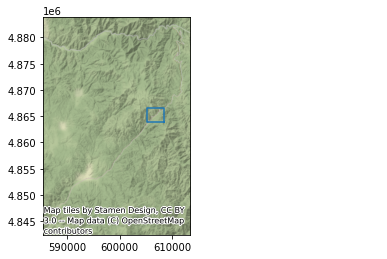

In [6]:
with laspy.open('/Users/zachkeskinen/Documents/ice-road-copters/data/results/clipped_PC.laz') as f:
    hdr = f.header
f, ax = plt.subplots()
laz_box = box(hdr.x_min, hdr.y_min, hdr.x_max, hdr.y_max)
x,y = laz_box.exterior.xy
ax.plot(x,y)
buf.plot(ax = ax, color = 'red')
ctx.add_basemap(ax = ax, crs = buf.crs)